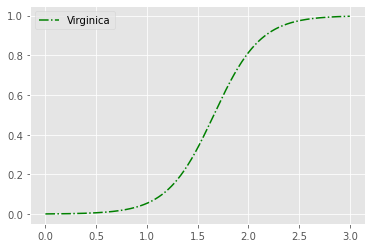

In [5]:
'''To train a model to find out whether a given data is virginica or not.'''
from sklearn import datasets,linear_model
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style

iris= datasets.load_iris()
## print (iris.keys())
## print (iris.data)


'''Training a Logistic regression model. '''
x= iris.data[:,3:] # slicing the third index feature.
## x= iris['data'][:,3:] #can also be written this way 
## print (x)

## y= iris.target == 2 # will display true if index is 2 else for any other values false.
## y = iris['target']==2 # Another way to write
y = (iris.target==2).astype(np.int32) # Diplay true or false in binary output i.e. 1 or 0. 'int32' or 'int64' can be used. Dont use 'int' as it will throw a warning message.
## print (y)

clf= LogisticRegression()
clf.fit(x,y)
output_label = clf.predict([[4.5]])
# print (output_label)
'''Output:
Returns the binary output 0 or 1 whether a flower is Virginica for single instance. '''


'''Creating a new dataset to analyze values as input to the model for plotting.
Training a Logistic regression model for multiple instance'''
## Here (-100,1) (-500,1) will give the same results.(1,-100) (1,-500) etc will reverse the array rows and columns. 
## Negative values -100,-500 doesn't affect the results. Cannot leave empty so need to fill the brackets with any negative value and obtain the required array size.
x_new = np.linspace(0,3,1000).reshape(-1,1) 
'''In NumPy, -1 in reshape(-1) refers to an unknown dimension that the reshape() function calculates for you. 
It is like saying: “I will leave this dimension for the reshape() function to determine”. 
A common use case is to flatten a nested array of an unknown number of elements to a 1D array.'''
## Here (-100,1) (-500,1) will give the same results.(1,-100) (1,-500) etc will reverse the array rows and columns. 
# Negative values doesn't affect the results.
## print (x_new)
## print (x_new.shape)
all_labels= clf.predict(x_new)
# print (all_labels)
# print (all_labels.shape)
'''Output:
Returns the binary output 0 or 1 whether a flower is Virginica for 
the new 1000 instances (x_new) between values 0 and 3 we created above for testing.'''


'''Using Matplotlib to predict the probability of the 1000 dataset we created 
and plotting the same to check for the sigmoid function.'''
style.use('ggplot')
y_prob= clf.predict_proba(x_new)
# print (y_prob) # Prints 2 columns 
# print (y_prob[0])
# print (y_prob.shape)
plt.plot (x_new,y_prob[:, 1],"g-.",label='Virginica') 
# plotting x and y values. Also slicing the predicted 2 columns in 1 column.
'g-- means the graph would be in green colour with dashed line(dashes can be changed). It is usually blue in color '
'''predict_proba() produces output of shape (n, k) where n is the number of data points and k is the number of classes you're trying to classify. 
Here we have two classes, first class is the probability that 'the flower not being  Virginica', 
and the second one is 'the flower being Virginica' , and hence we have 2 columns. 
Say your labels(classes) are ["not being Verginica", "being Virginica"]. 
If a datapoint is predicted to have 80% chance of 'not being Verginica' and consequently 20% chance of 'being Verginica', 
then your output row for that point will be [0.8, 0.2] to reflect these probabilities. 
Hence  if you don't slice the other column and consider  both the columns for plotting , 
at certain instance of [0.5, 0.5] you could see the plots intersecting each other for the sigmoid function.
Adding up the columns of any instance will return the answer to be 1 i.e. [0.8 +0.2 ]= 1.
Here we are considering the second column(index1) which displays the probability of being a 'Virginica'. '''
plt.legend()
plt.show()
